In [1]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## To draw DT
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## Embeded Datasets
from sklearn import datasets

## For shuffling the Dataset
from sklearn import utils

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict

## Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Metric
from sklearn.metrics import accuracy_score, r2_score

## `Classification`

### `Loading the iris Dataset`

In [2]:
## Load the iris dataset from the embeded datasets provided in sklearn
iris_dataset = datasets.load_iris()

## check the dataset by checking its keys
iris_dataset.keys()           ## each key has data or information

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
## Let's get all together and create a DF
## I will do it in very fast way and it is my preferable one, but there are many ways as we learned together 

df_iris = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target'].reshape(-1, 1)], 
                       columns=iris_dataset['feature_names']+['target'])

## check the head
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
## Let's shuffle the Dataset as you see that the target is ordered (0 then 1 then 2) --> Classification problem
## You can use function (sample) provided in pandas or use (shuffle) in sklearn
df_iris = utils.shuffle(df_iris, random_state=42)   ## shuffle and overwrite

## check the head again
df_iris.head()    ## OK

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1.0
18,5.7,3.8,1.7,0.3,0.0
118,7.7,2.6,6.9,2.3,2.0
78,6.0,2.9,4.5,1.5,1.0
76,6.8,2.8,4.8,1.4,1.0


### `Exploratory Data Analysis (EDA)`

In [5]:
## Do it Yourself

### `Preprocessing`
`The Dataset is very small, It is a Toy example, I will not split the data`

In [6]:
### Split the Dataset to Features and Target
X = df_iris.drop(columns=['target'], axis=1)
y = df_iris['target']

In [7]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
                              ]
                       )

X_train = num_pipeline.fit_transform(X)
y_train = y.copy()   ## doesn't matter

### `Building a ML Model`
* ` ---> Classification Problem`

In [8]:
## Decision Trees  ----> talk with your instructor about all these hyperparameters
## max_depth: the most important hyperparameter, depth of the tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)     ## take your time playing with all these hyperparams
tree_clf.fit(X_train, y_train)   ## fit

DecisionTreeClassifier(max_depth=3)

In [9]:
## Predict using croos validation
y_scores_tree = cross_val_score(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Mean of Accurcay Scores using Trees -- {y_scores_tree.mean():.4f}')
print(f'Std of Accurcay Scores using Trees --  {y_scores_tree.std():.4f}')

print('---'*30)

## Prediction
y_pred_tree = cross_val_predict(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

## If you want to see the scores (here it is a probability as we discussed before) --> sum of each row is 1
## Each row represent the probability of each class (class_0, class_1, class_2)
y_probas_tree = cross_val_predict(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict_proba')

Mean of Accurcay Scores using Trees -- 0.9533
Std of Accurcay Scores using Trees --  0.0340
------------------------------------------------------------------------------------------


In [10]:
## Take your time playing with code, trying different hyperparams, trying to get what we discussed in classification session
## Try to get more scores (conf matrix, .........)
## Try to check attributes of this model

### `You can draw the tree`

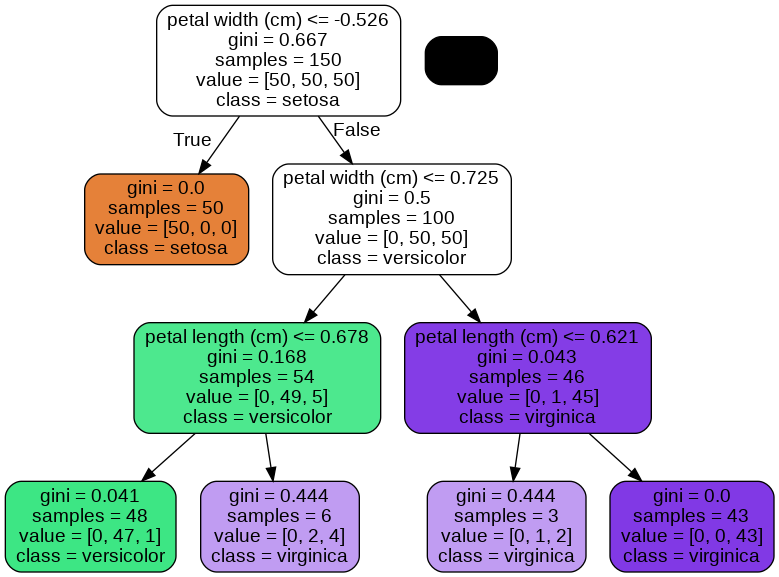

In [11]:
## Pass the model and the out_file, feature_names, class_names (as a list -- what you want (string or int))
## and options (rounded and filled) ---- and also what else you want
dot_data = export_graphviz(tree_clf, out_file=None,
                            feature_names=iris_dataset['feature_names'], 
                            class_names=iris_dataset['target_names'], 
                            filled=True, rounded=True)
## The Graph
graph = pydotplus.graph_from_dot_data(dot_data) # Show graph

## Show the image (Image --> imported from IPython)
Image(graph.create_png()) 

## `Regression`

In [12]:
## Loading the Dataset for Regression
diabet_dataset = datasets.load_diabetes()

## To DataFrame
df_diabet = pd.DataFrame(np.c_[diabet_dataset['data'], diabet_dataset['target'].reshape(-1, 1)], 
                         columns=diabet_dataset['feature_names']+['target'])

df_diabet.head()  

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
## Slice to Features and Traget
X_diabet = df_diabet.drop(columns=['target'], axis=1) 
y_diabet = df_diabet['target']


## Pipeline
diabet_pipeline = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())
                                ]
                          )

## Fit
X_train_2 = diabet_pipeline.fit_transform(X_diabet)
y_train_2 = y_diabet.copy()

### `Building ML Model`
* > `Regression problem`

In [14]:
## DT, take your time playing with hyperparams, all is the same except the criterion
tree_reg = DecisionTreeRegressor(max_depth=2, criterion='squared_error')
tree_reg.fit(X_train_2, y_train_2)

DecisionTreeRegressor(max_depth=2)

In [15]:
## Predict using croos validation
y_scores_tree = cross_val_score(estimator=tree_reg, X=X_train_2, y=y_train_2, cv=5, n_jobs=-1, scoring='r2')
print(f'R2 Score using Trees -- {y_scores_tree.mean():.4f}')

print('---'*30)

## Prediction
y_pred_tree = cross_val_predict(estimator=tree_reg, X=X_train_2, y=y_train_2, cv=5, n_jobs=-1, method='predict')

R2 Score using Trees -- 0.3268
------------------------------------------------------------------------------------------


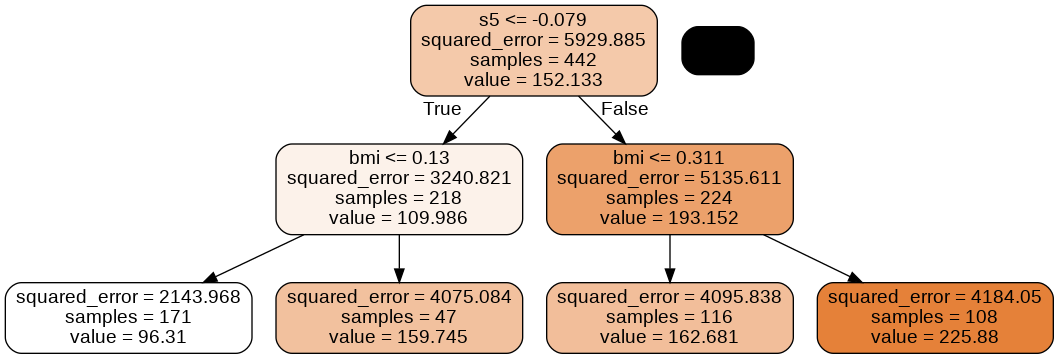

In [16]:
## Pass the model and the out_file, feature_names, class_names (as a list -- what you want (string or int))
## and options (rounded and filled) ---- and also what else you want
dot_data = export_graphviz(tree_reg, out_file=None,
                            feature_names=diabet_dataset['feature_names'], 
                            filled=True, rounded=True)
## The Graph
graph = pydotplus.graph_from_dot_data(dot_data) # Show graph

## Show the image (Image --> imported from IPython)
Image(graph.create_png()) 

### `Take your time playing with code and more details later`